Q1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results ?

In [ ]:
# Ans.

import numpy as np
from scipy import stats

# Sample data (you can modify these values)
sample_data = [102, 100, 98, 105, 101, 99, 97, 103, 100, 98]
population_mean = 100
population_std = 3  # Known population standard deviation
alpha = 0.05  # Significance level

# Step 1: Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Step 2: Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Step 3: Calculate P-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 4: Interpret the results
print("Sample Mean:", sample_mean)
print("Z-score:", round(z_score, 4))
print("P-value:", round(p_value, 4))

if p_value < alpha:
    print("Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference from the population mean.")

Sample Mean: 100.3
Z-score: 0.3162
P-value: 0.7518
Result: Fail to reject the null hypothesis. No significant difference from the population mean.


Q2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python ?

In [1]:
#Ans.

import numpy as np
from scipy import stats

# Simulate two random samples
np.random.seed(42)  # for reproducibility
sample1 = np.random.normal(loc=5, scale=2, size=50)  # Sample 1: mean=5, std=2
sample2 = np.random.normal(loc=6, scale=2, size=50)  # Sample 2: mean=6, std=2


# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There's a statistically significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There's no statistically significant difference between the means of the two samples.")


# Perform a paired samples t-test
# Simulate paired data (e.g., before and after measurements)
before = np.random.normal(loc=10, scale=3, size=30)
after = before + np.random.normal(loc=1, scale=1, size=30) #add 1 to simulate effect

t_statistic_paired, p_value_paired = stats.ttest_rel(before, after)

print("\nPaired T-test:")
print("T-statistic (paired):", t_statistic_paired)
print("P-value (paired):", p_value_paired)

if p_value_paired < alpha:
    print("Reject null hypothesis (paired): There's a statistically significant difference in means between paired samples.")
else:
    print("Fail to reject null hypothesis (paired): No statistically significant difference between paired samples.")


T-statistic: -4.1087239282048085
P-value: 8.261945608702637e-05
Reject the null hypothesis: There's a statistically significant difference between the means of the two samples.

Paired T-test:
T-statistic (paired): -5.468956945608193
P-value (paired): 6.895399077640732e-06
Reject null hypothesis (paired): There's a statistically significant difference in means between paired samples.


Q3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean ?

In [3]:
#Ans.

import numpy as np
from scipy import stats

def one_sample_z_test(sample_data, population_mean, population_std, alpha=0.05):
    """
    Performs a one-sample Z-test.

    Args:
        sample_data: A list or numpy array of sample data.
        population_mean: The population mean.
        population_std: The population standard deviation.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the Z-score, p-value, and test result.
    """

    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

    if p_value < alpha:
        result = "Reject the null hypothesis"
    else:
        result = "Fail to reject the null hypothesis"

    return {"z_score": z_score, "p_value": p_value, "result": result}

# Example usage (using the data provided in the prompt):
sample_data = [102, 100, 98, 105, 101, 99, 97, 103, 100, 98]
population_mean = 100
population_std = 3
alpha = 0.05

test_result = one_sample_z_test(sample_data, population_mean, population_std, alpha)
test_result


{'z_score': np.float64(0.31622776601683494),
 'p_value': np.float64(0.7518296340458515),
 'result': 'Fail to reject the null hypothesis'}

Q4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot ?

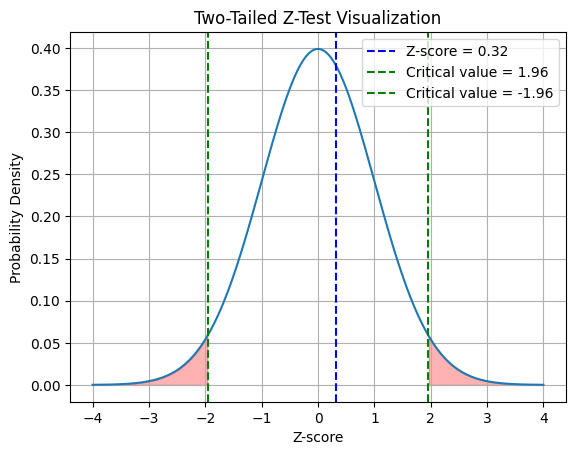

Z-score: 0.32
P-value: 0.752
Result: Fail to reject the null hypothesis.


In [4]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_z_test(sample_data, population_mean, population_std, alpha=0.05):
    """
    Performs a two-tailed Z-test and visualizes the decision region.

    Args:
        sample_data: A list or numpy array of sample data.
        population_mean: The population mean.
        population_std: The population standard deviation.
        alpha: The significance level (default is 0.05).
    """

    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Generate x-values for the normal distribution plot
    x = np.linspace(-4, 4, 500)  # Adjust range as needed
    y = norm.pdf(x)

    # Critical values
    critical_value = norm.ppf(1 - alpha / 2)
    critical_value_neg = -critical_value

    # Plotting
    plt.plot(x, y)
    plt.fill_between(x[x <= critical_value_neg], 0, norm.pdf(x[x <= critical_value_neg]), color='red', alpha=0.3)
    plt.fill_between(x[x >= critical_value], 0, norm.pdf(x[x >= critical_value]), color='red', alpha=0.3)

    plt.axvline(x=z_score, color='blue', linestyle='--', label=f'Z-score = {z_score:.2f}')
    plt.axvline(x=critical_value, color='green', linestyle='--', label=f'Critical value = {critical_value:.2f}')
    plt.axvline(x=critical_value_neg, color='green', linestyle='--', label=f'Critical value = {critical_value_neg:.2f}')


    plt.xlabel("Z-score")
    plt.ylabel("Probability Density")
    plt.title("Two-Tailed Z-Test Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Z-score: {z_score:.2f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < alpha:
        print("Result: Reject the null hypothesis.")
    else:
        print("Result: Fail to reject the null hypothesis.")
# Example usage
sample_data = [102, 100, 98, 105, 101, 99, 97, 103, 100, 98]
population_mean = 100
population_std = 3
alpha = 0.05
visualize_z_test(sample_data, population_mean, population_std, alpha)


Q5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing ?

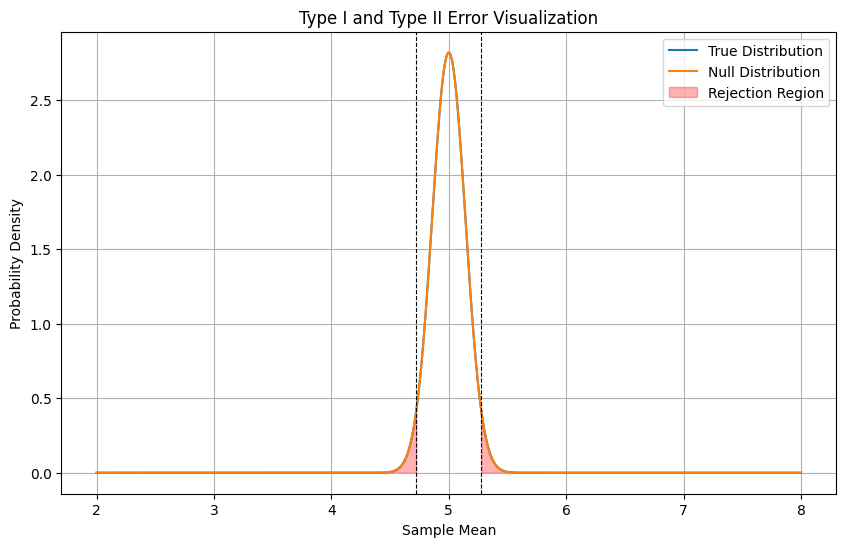

Type I error (alpha): 0.05
Type II error (beta): 0.058
Power of the test (1-beta): 0.942


In [5]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(true_mean, sample_size, alpha, effect_size):
    """
    Visualizes Type 1 and Type 2 errors in hypothesis testing.

    Args:
        true_mean: The true population mean.
        sample_size: The size of the random samples.
        alpha: The significance level (probability of Type 1 error).
        effect_size: The difference between the true mean and the null hypothesis mean.
    """

    # Null hypothesis mean
    null_mean = true_mean  # Assume null hypothesis is true

    # Calculate standard error
    std_error = 1 / np.sqrt(sample_size) # Assuming population std dev is 1

    # Critical values for the rejection region
    critical_value = norm.ppf(1 - alpha / 2)
    lower_bound = null_mean - critical_value * std_error
    upper_bound = null_mean + critical_value * std_error

    # Generate x-values for the normal distributions
    x = np.linspace(true_mean - 3, true_mean + 3, 500)

    # Plot the distributions under the null and alternative hypotheses
    plt.figure(figsize=(10, 6))
    plt.plot(x, norm.pdf(x, loc=true_mean, scale=std_error), label='True Distribution')
    plt.plot(x, norm.pdf(x, loc=null_mean, scale=std_error), label='Null Distribution')

    # Shade the rejection region
    x_rejection = np.linspace(upper_bound, true_mean + 3, 100)
    plt.fill_between(x_rejection, 0, norm.pdf(x_rejection, loc=null_mean, scale=std_error), color='red', alpha=0.3, label='Rejection Region')
    x_rejection_lower = np.linspace(true_mean - 3, lower_bound, 100)
    plt.fill_between(x_rejection_lower, 0, norm.pdf(x_rejection_lower, loc=null_mean, scale=std_error), color='red', alpha=0.3)


    # Calculate and indicate Type II error (beta)
    beta = norm.cdf(upper_bound, loc=true_mean + effect_size, scale=std_error) - norm.cdf(lower_bound, loc=true_mean + effect_size, scale=std_error)

    plt.axvline(x=lower_bound, color='k', linestyle='--', linewidth=0.8)
    plt.axvline(x=upper_bound, color='k', linestyle='--', linewidth=0.8)

    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.title("Type I and Type II Error Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Type I error (alpha): {alpha}")
    print(f"Type II error (beta): {beta:.3f}")
    print(f"Power of the test (1-beta): {1-beta:.3f}")


# Example usage
true_mean = 5
sample_size = 50
alpha = 0.05
effect_size = 0.5  # Example effect size
visualize_errors(true_mean, sample_size, alpha, effect_size)


Q6. Write a Python program to perform an independent T-test and interpret the results ?

In [6]:
#Ans.


import numpy as np
from scipy import stats

def independent_ttest(sample1, sample2, alpha=0.05):
    """
    Performs an independent two-sample t-test.

    Args:
        sample1: A list or numpy array of data for the first sample.
        sample2: A list or numpy array of data for the second sample.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the t-statistic, p-value, and test result.
    """

    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    if p_value < alpha:
        result = "Reject the null hypothesis: There's a statistically significant difference between the means of the two samples."
    else:
        result = "Fail to reject the null hypothesis: There's no statistically significant difference between the means of the two samples."

    return {"t_statistic": t_statistic, "p_value": p_value, "result": result}

# Example usage:
sample1 = [10, 12, 15, 11, 13]
sample2 = [8, 9, 10, 7, 11]
alpha = 0.05

test_result = independent_ttest(sample1, sample2, alpha)
test_result


{'t_statistic': np.float64(2.8736848324283977),
 'p_value': np.float64(0.02071138748808119),
 'result': "Reject the null hypothesis: There's a statistically significant difference between the means of the two samples."}

Q7. Perform a paired sample T-test using Python and visualize the comparison results ?

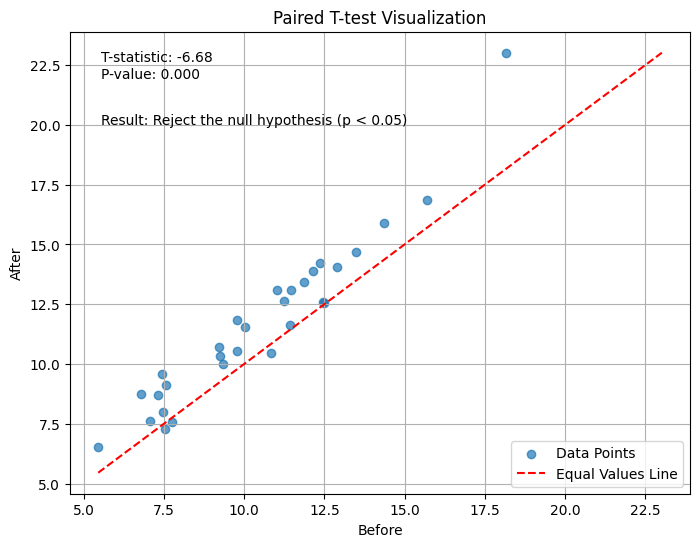

In [7]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt

def paired_ttest_visualization(before, after, alpha=0.05):
    """
    Performs a paired sample T-test and visualizes the comparison results.

    Args:
        before: A list or numpy array of data before the treatment/change.
        after: A list or numpy array of data after the treatment/change.
        alpha: The significance level (default is 0.05).
    """

    t_statistic, p_value = stats.ttest_rel(before, after)

    plt.figure(figsize=(8, 6))
    plt.scatter(before, after, alpha=0.7, label='Data Points')
    plt.xlabel("Before")
    plt.ylabel("After")
    plt.title("Paired T-test Visualization")

    # Add a diagonal line for reference (equal before and after)
    min_val = min(min(before), min(after))
    max_val = max(max(before), max(after))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', label='Equal Values Line')

    plt.text(0.05, 0.9, f"T-statistic: {t_statistic:.2f}\nP-value: {p_value:.3f}",
             transform=plt.gca().transAxes)


    if p_value < alpha:
        plt.text(0.05, 0.8, f"Result: Reject the null hypothesis (p < {alpha})",
             transform=plt.gca().transAxes)
    else:
        plt.text(0.05, 0.8, f"Result: Fail to reject the null hypothesis (p >= {alpha})",
             transform=plt.gca().transAxes)

    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage (using the data from the provided code)
before = np.random.normal(loc=10, scale=3, size=30)
after = before + np.random.normal(loc=1, scale=1, size=30)

paired_ttest_visualization(before, after)


Q8. Simulate data and perform both Z-test and T-test, then compare the results using Python ?

In [8]:
#Ans.

import numpy as np
from scipy import stats

# Simulate data
np.random.seed(0)  # for reproducibility
population_mean = 50
population_std = 10
sample_size = 30
sample_data = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)


# Z-test
z_statistic = (np.mean(sample_data) - population_mean) / (population_std / np.sqrt(sample_size))
z_p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic))) #two tailed


# T-test
t_statistic, t_p_value = stats.ttest_1samp(sample_data, population_mean)

print("Z-test:")
print("Statistic:", z_statistic)
print("P-value:", z_p_value)

print("\nT-test:")
print("Statistic:", t_statistic)
print("P-value:", t_p_value)

print("\nComparison:")
print("When sample size is large, Z and T test results are very similar")
print(f"In this case, sample size is {sample_size}")
if abs(z_p_value - t_p_value) < 0.01:
    print("The p-values from the Z-test and the t-test are very similar.")
else:
    print("The p-values from the Z-test and the t-test are different.")


Z-test:
Statistic: 2.4256246590263744
P-value: 0.015282066343743628

T-test:
Statistic: 2.2044551627605724
P-value: 0.035580270712694984

Comparison:
When sample size is large, Z and T test results are very similar
In this case, sample size is 30
The p-values from the Z-test and the t-test are different.


Q9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance ?

In [9]:
#Ans.

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    """
    Calculates the confidence interval for a sample mean.

    Args:
        data: A list or numpy array of sample data.
        confidence: The desired confidence level (default is 0.95).

    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

# Example usage:
data = [102, 100, 98, 105, 101, 99, 97, 103, 100, 98]  # Sample data
confidence_level = 0.95

lower_bound, upper_bound = confidence_interval(data, confidence_level)

print(f"Confidence Interval ({confidence_level*100:.0f}%): ({lower_bound:.2f}, {upper_bound:.2f})")


# Significance of Confidence Interval:

# A confidence interval provides a range of values within which the true population mean is likely to fall with a certain degree of confidence.
# For example, a 95% confidence interval means that if we were to repeat the sampling process many times, 95% of the calculated confidence intervals would contain the true population mean.

# It's crucial to understand that the confidence interval is about the *method* of estimation, not about a specific interval.  We are not 95% certain that the true population mean lies within our calculated interval.  Instead, we are 95% certain that the *method* we used to calculate the interval will produce a range that includes the true population mean in 95% of repeated samples.


Confidence Interval (95%): (98.51, 102.09)


Q10. Write a Python program to calculate the margin of error for a given confidence level using sample data ?

In [10]:
# Ans.


import numpy as np
from scipy import stats

def margin_of_error(data, confidence=0.95):
    """
    Calculates the margin of error for a given confidence level using sample data.

    Args:
        data: A list or numpy array of sample data.
        confidence: The desired confidence level (default is 0.95).

    Returns:
        The margin of error.
    """
    a = 1.0 * np.array(data)
    n = len(a)
    se = stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n - 1)
    return h

# Example usage:
data = [102, 100, 98, 105, 101, 99, 97, 103, 100, 98]  # Sample data
confidence_level = 0.95

margin = margin_of_error(data, confidence_level)

print(f"Margin of Error ({confidence_level * 100:.0f}%): {margin:.2f}")


Margin of Error (95%): 1.79


Q11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process ?

In [13]:
#Ans.

# Bayesian Inference Example

def bayesian_inference(prior_H, likelihood_D_given_H, likelihood_D_given_not_H):
    """
    Apply Bayes' Theorem to compute the posterior probability.

    Parameters:
    - prior_H: Prior probability of hypothesis H (e.g., having disease)
    - likelihood_D_given_H: Likelihood of data given H (e.g., test positive if diseased)
    - likelihood_D_given_not_H: Likelihood of data given not H (e.g., test positive if healthy)

    Returns:
    - posterior probability: P(H|D)
    """
    # Compute P(D)
    prob_D = (likelihood_D_given_H * prior_H) + (likelihood_D_given_not_H * (1 - prior_H))

    # Compute P(H|D) using Bayes' Theorem
    posterior_H_given_D = (likelihood_D_given_H * prior_H) / prob_D

    return posterior_H_given_D

# Given Values
prior_disease = 0.01                     # P(H) = 1%
likelihood_positive_given_disease = 0.99  # P(D|H) = 99%
likelihood_positive_given_no_disease = 0.01  # P(D|¬H) = 1%

# Calculate
posterior = bayesian_inference(prior_disease, likelihood_positive_given_disease, likelihood_positive_given_no_disease)

# Show the result
print(f"Probability of having the disease given a positive test: {posterior:.4f} or {posterior*100:.2f}%")

Probability of having the disease given a positive test: 0.5000 or 50.00%


Q12.  Perform a Chi-square test for independence between two categorical variables in Python ?

In [15]:
#Ans.

import numpy as np
def chi_square_test(observed_data):
    """
    Performs a Chi-square test for independence.

    Args:
        observed_data: A 2D numpy array or list of lists representing the observed frequencies.

    Returns:
        A dictionary containing the chi-square statistic, p-value, degrees of freedom, and expected frequencies.
    """
    observed = np.array(observed_data)
    chi2, p, dof, expected = stats.chi2_contingency(observed)

    return {
        "chi2_statistic": chi2,
        "p_value": p,
        "degrees_of_freedom": dof,
        "expected_frequencies": expected,
    }

# Example usage:
# Observed frequencies of two categorical variables (e.g., gender and preference)
observed_data = [
    [20, 30],  # Male preferences
    [15, 25],  # Female preferences
]

test_result = chi_square_test(observed_data)
print(test_result)

alpha = 0.05  # Significance level

if test_result["p_value"] < alpha:
    print("Result: Reject the null hypothesis. There is a significant association between the two variables.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant association between the two variables.")


{'chi2_statistic': np.float64(0.0005844155844156049), 'p_value': np.float64(0.9807132675440436), 'degrees_of_freedom': 1, 'expected_frequencies': array([[19.44444444, 30.55555556],
       [15.55555556, 24.44444444]])}
Result: Fail to reject the null hypothesis. There is no significant association between the two variables.


Q13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data ?

In [16]:
#Ans.

import numpy as np
def calculate_expected_frequencies(observed_data):
    """
    Calculates the expected frequencies for a Chi-square test.

    Args:
        observed_data: A 2D numpy array or list of lists representing the observed frequencies.

    Returns:
        A 2D numpy array representing the expected frequencies.
    """
    observed = np.array(observed_data)
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    return expected

# Example usage (using the observed data from the previous example):
observed_data = [
    [20, 30],  # Male preferences
    [15, 25],  # Female preferences
]

expected_frequencies = calculate_expected_frequencies(observed_data)
print("Expected Frequencies:")
expected_frequencies


Expected Frequencies:


array([[19.44444444, 30.55555556],
       [15.55555556, 24.44444444]])

Q14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution ?

In [17]:
#Ans.

from scipy.stats import chisquare

def goodness_of_fit(observed, expected):
    """
    Performs a goodness-of-fit test using the Chi-square test.

    Args:
        observed: A list or numpy array of observed frequencies.
        expected: A list or numpy array of expected frequencies.

    Returns:
        A dictionary containing the chi-square statistic, p-value, and degrees of freedom.
    """

    chi2, p = chisquare(observed, f_exp=expected)
    dof = len(observed) - 1  # Degrees of freedom

    return {"chi2_statistic": chi2, "p_value": p, "degrees_of_freedom": dof}

# Example Usage
observed_frequencies = [15, 25, 20, 20, 20]  # Example observed frequencies
expected_frequencies = [20, 20, 20, 20, 20]  # Example expected frequencies (uniform distribution in this case)

test_result = goodness_of_fit(observed_frequencies, expected_frequencies)

print(test_result)
alpha = 0.05
if test_result["p_value"] < alpha:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")


{'chi2_statistic': np.float64(2.5), 'p_value': np.float64(0.6446357929354278), 'degrees_of_freedom': 4}
Fail to reject the null hypothesis.


Q15.  Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics ?

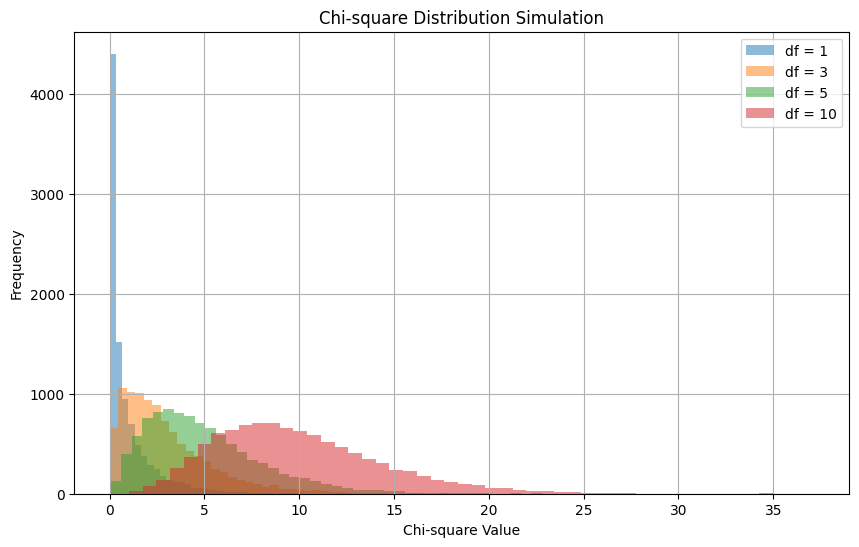

Characteristics of Chi-square Distribution:
- The Chi-square distribution is a continuous probability distribution.
- It is defined by one parameter: degrees of freedom (df).
- The distribution is always right-skewed (positively skewed).
- As the degrees of freedom increase, the Chi-square distribution becomes more symmetrical and approaches a normal distribution.
- It's commonly used in hypothesis testing, especially for categorical data.
- It's also used to calculate confidence intervals for variance and standard deviation.


In [18]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def simulate_and_visualize_chi2(df_values, size=10000):
    """
    Simulates and visualizes the Chi-square distribution for different degrees of freedom.

    Args:
        df_values: A list of degrees of freedom values.
        size: The number of random samples to generate for each degree of freedom.
    """
    plt.figure(figsize=(10, 6))

    for df in df_values:
        # Simulate random samples from the Chi-square distribution
        samples = chi2.rvs(df, size=size)

        # Plot the histogram of the samples
        plt.hist(samples, bins=50, alpha=0.5, label=f'df = {df}')

    plt.xlabel("Chi-square Value")
    plt.ylabel("Frequency")
    plt.title("Chi-square Distribution Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()


    print("Characteristics of Chi-square Distribution:")
    print("- The Chi-square distribution is a continuous probability distribution.")
    print("- It is defined by one parameter: degrees of freedom (df).")
    print("- The distribution is always right-skewed (positively skewed).")
    print("- As the degrees of freedom increase, the Chi-square distribution becomes more symmetrical and approaches a normal distribution.")
    print("- It's commonly used in hypothesis testing, especially for categorical data.")
    print("- It's also used to calculate confidence intervals for variance and standard deviation.")

# Example usage
degrees_of_freedom = [1, 3, 5, 10]  # Different degrees of freedom
simulate_and_visualize_chi2(degrees_of_freedom)


Q16. Implement an F-test using Python to compare the variances of two random samples ?

In [19]:
#Ans.


import numpy as np
def f_test(sample1, sample2, alpha=0.05):
    """
    Performs an F-test to compare the variances of two samples.

    Args:
      sample1: The first sample data.
      sample2: The second sample data.
      alpha: The significance level (default is 0.05).

    Returns:
      A dictionary containing the F-statistic, p-value, and test result.
    """

    f_statistic, p_value = stats.f_oneway(sample1, sample2)

    if p_value < alpha:
        result = "Reject the null hypothesis: Variances are significantly different."
    else:
        result = "Fail to reject the null hypothesis: No significant difference in variances."

    return {"f_statistic": f_statistic, "p_value": p_value, "result": result}

# Example usage
sample1 = np.random.normal(loc=10, scale=2, size=50)  # Sample 1: mean=10, std=2
sample2 = np.random.normal(loc=12, scale=3, size=50)  # Sample 2: mean=12, std=3 (different variance)

test_result = f_test(sample1, sample2)
test_result


{'f_statistic': np.float64(17.338761432716943),
 'p_value': np.float64(6.732231433702836e-05),
 'result': 'Reject the null hypothesis: Variances are significantly different.'}

Q17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results ?

In [20]:
#Ans.

def anova_test(data, alpha=0.05):
    """
    Performs an ANOVA test to compare means between multiple groups.

    Args:
        data: A dictionary where keys are group names and values are lists of data points for each group.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the F-statistic, p-value, and test result.
    """
    groups = list(data.values())
    f_statistic, p_value = stats.f_oneway(*groups)

    if p_value < alpha:
        result = "Reject the null hypothesis: There is a statistically significant difference in means between at least two groups."
    else:
        result = "Fail to reject the null hypothesis: No significant difference in means between the groups."

    return {"f_statistic": f_statistic, "p_value": p_value, "result": result}

# Example usage
data = {
    'Group A': [10, 12, 15, 11, 13],
    'Group B': [8, 9, 10, 7, 11],
    'Group C': [14, 16, 18, 15, 17]
}

test_result = anova_test(data)
test_result


{'f_statistic': np.float64(21.17241379310345),
 'p_value': np.float64(0.00011591461171059059),
 'result': 'Reject the null hypothesis: There is a statistically significant difference in means between at least two groups.'}

Q18.  Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results ?

<ipython-input-21-396f472fdba2>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=group_names, patch_artist=True, showmeans=True)


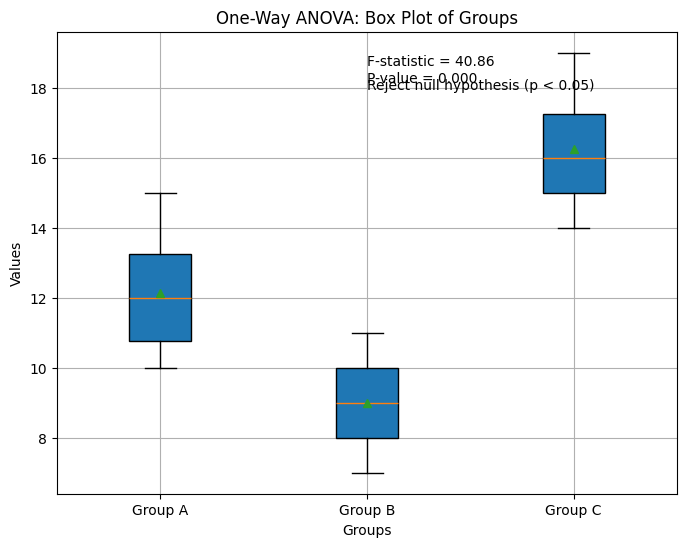

F-statistic: 40.85747126436777
P-value: 5.769650496817443e-08
Result: Reject the null hypothesis. There is a statistically significant difference in means between at least two groups.


In [21]:
# Ans.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def oneway_anova_with_plot(data, alpha=0.05):
    """
    Performs a one-way ANOVA test and creates a box plot for visualization.

    Args:
      data: A dictionary where keys are group names and values are lists of data points for each group.
      alpha: Significance level for the test.
    """
    groups = list(data.values())
    group_names = list(data.keys())
    f_statistic, p_value = stats.f_oneway(*groups)

    # Create box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(groups, labels=group_names, patch_artist=True, showmeans=True)
    plt.xlabel("Groups")
    plt.ylabel("Values")
    plt.title("One-Way ANOVA: Box Plot of Groups")
    plt.grid(True)

    # Add ANOVA results to plot
    plt.text(0.5, 0.95, f"F-statistic = {f_statistic:.2f}\nP-value = {p_value:.3f}",
            transform=plt.gca().transAxes, fontsize=10, va='top')

    if p_value < alpha:
      plt.text(0.5, 0.9, f"Reject null hypothesis (p < {alpha})", transform=plt.gca().transAxes, fontsize=10, va='top')
    else:
      plt.text(0.5, 0.9, f"Fail to reject null hypothesis (p >= {alpha})", transform=plt.gca().transAxes, fontsize=10, va='top')

    plt.show()

    # Print ANOVA results
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print("Result: Reject the null hypothesis. There is a statistically significant difference in means between at least two groups.")
    else:
        print("Result: Fail to reject the null hypothesis. No significant difference in means between the groups.")

# Example usage:
data = {
    'Group A': [10, 12, 15, 11, 13, 10, 14, 12],
    'Group B': [8, 9, 10, 7, 11, 9, 8, 10],
    'Group C': [14, 16, 18, 15, 17, 16, 15, 19]
}

oneway_anova_with_plot(data)


Q19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA ?

In [22]:
# Ans.

import scipy.stats as stats

def check_anova_assumptions(data):
    """
    Checks the assumptions for ANOVA: normality, independence, and equal variance.

    Args:
        data: A dictionary where keys are group names and values are lists of data points for each group.

    Returns:
        A dictionary with boolean values indicating whether each assumption is met (True) or not (False).
        Also includes details about each assumption.
    """

    group_names = list(data.keys())
    groups = list(data.values())
    num_groups = len(groups)

    results = {}

    # 1. Normality
    results["normality"] = True
    normality_details = ""
    for i, group in enumerate(groups):
        shapiro_test = stats.shapiro(group)
        if shapiro_test.pvalue < 0.05:
            results["normality"] = False
            normality_details += f"Group {group_names[i]} failed Shapiro-Wilk normality test (p={shapiro_test.pvalue:.3f})\n"

    results["normality_details"] = normality_details

    # 2. Independence (usually assumed, can't be tested statistically)
    results["independence"] = True  # Assumed
    results["independence_details"] = "Independence of observations is assumed based on experimental design."


    # 3. Equal Variance (Levene's Test)
    levene_test = stats.levene(*groups)
    results["equal_variance"] = levene_test.pvalue >= 0.05
    results["equal_variance_details"] = f"Levene's test for equality of variances: p={levene_test.pvalue:.3f}"

    return results

# Example usage (using the data from the previous example):
data = {
    'Group A': [10, 12, 15, 11, 13, 10, 14, 12],
    'Group B': [8, 9, 10, 7, 11, 9, 8, 10],
    'Group C': [14, 16, 18, 15, 17, 16, 15, 19]
}

assumption_results = check_anova_assumptions(data)
assumption_results


{'normality': True,
 'normality_details': '',
 'independence': True,
 'independence_details': 'Independence of observations is assumed based on experimental design.',
 'equal_variance': np.True_,
 'equal_variance_details': "Levene's test for equality of variances: p=0.732"}

Q20.  Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results ?


Two-Way ANOVA Result:

                               sum_sq    df           F        PR(>F)
C(Teaching_Method)             27.225   1.0    3.526808  6.850308e-02
C(Gender)                     855.625   1.0  110.840230  1.543267e-12
C(Teaching_Method):C(Gender)    0.225   1.0    0.029147  8.653956e-01
Residual                      277.900  36.0         NaN           NaN


<ipython-input-26-3e6f3c1a1fb6>:42: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Teaching_Method', y='Score', hue='Gender',


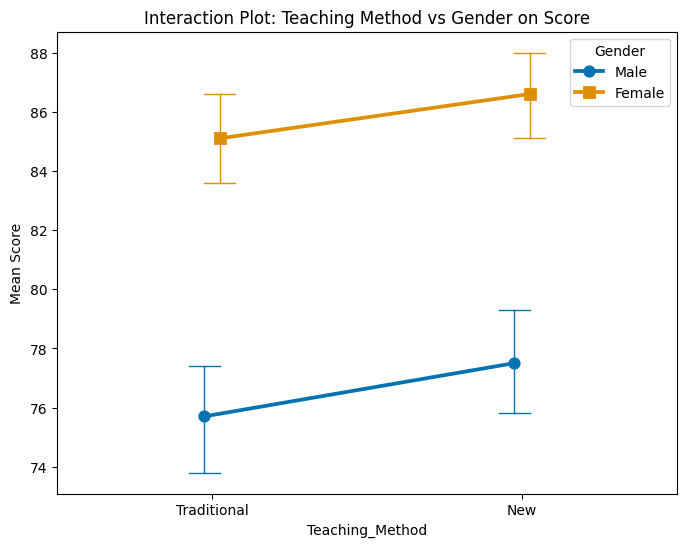

In [26]:
#Ans.

# Install necessary libraries (if you don't have them)
# pip install pandas statsmodels matplotlib seaborn

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create synthetic data
data = {
    'Teaching_Method': ['Traditional', 'Traditional', 'Traditional', 'Traditional',
                        'New', 'New', 'New', 'New'] * 5,
    'Gender': ['Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female'] * 5,
    'Score': [75, 80, 70, 85,
              82, 88, 78, 90,
              77, 83, 72, 86,
              80, 84, 76, 89,
              79, 85, 74, 87,
              81, 86, 73, 88,
              78, 84, 75, 85,
              76, 82, 74, 86,
              80, 87, 77, 89,
              79, 85, 76, 88]
}

df = pd.DataFrame(data)

# 2. Fit the Two-Way ANOVA model
model = ols('Score ~ C(Teaching_Method) + C(Gender) + C(Teaching_Method):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 3. Display ANOVA table
print("\nTwo-Way ANOVA Result:\n")
print(anova_table)

# 4. Visualize the interaction
plt.figure(figsize=(8,6))
sns.pointplot(data=df, x='Teaching_Method', y='Score', hue='Gender',
              dodge=True, markers=["o", "s"], capsize=.1, errwidth=1, palette="colorblind")

plt.title('Interaction Plot: Teaching Method vs Gender on Score')
plt.ylabel('Mean Score')
plt.show()

Q21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing ?

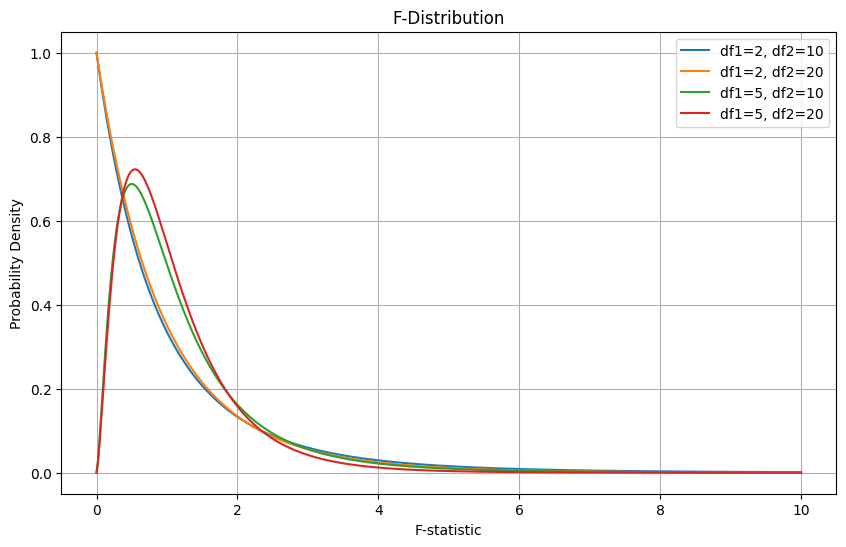

Use in Hypothesis Testing:
- The F-distribution is used in hypothesis tests that compare the variances of two populations.
- F-tests can be used to determine if two samples have been drawn from populations with equal variances.
- It is the foundation of the ANOVA (Analysis of Variance) test, which compares means across multiple groups.
- The F-statistic is calculated as the ratio of two variances, which are estimates of the population variance.
- The null hypothesis in many F-tests is that the population variances (or means) are equal.
- The degrees of freedom in the F-test are determined by the sizes of the samples and the number of groups.


In [27]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def visualize_f_distribution(df1_values, df2_values):
    """
    Visualizes the F-distribution for different degrees of freedom.

    Args:
      df1_values: A list of degrees of freedom values for the numerator.
      df2_values: A list of degrees of freedom values for the denominator.
    """
    plt.figure(figsize=(10, 6))

    for df1 in df1_values:
        for df2 in df2_values:
            x = np.linspace(0, 10, 500)  # Adjust the range as needed
            y = f.pdf(x, df1, df2)
            plt.plot(x, y, label=f'df1={df1}, df2={df2}')

    plt.xlabel("F-statistic")
    plt.ylabel("Probability Density")
    plt.title("F-Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()


    print("Use in Hypothesis Testing:")
    print("- The F-distribution is used in hypothesis tests that compare the variances of two populations.")
    print("- F-tests can be used to determine if two samples have been drawn from populations with equal variances.")
    print("- It is the foundation of the ANOVA (Analysis of Variance) test, which compares means across multiple groups.")
    print("- The F-statistic is calculated as the ratio of two variances, which are estimates of the population variance.")
    print("- The null hypothesis in many F-tests is that the population variances (or means) are equal.")
    print("- The degrees of freedom in the F-test are determined by the sizes of the samples and the number of groups.")



# Example usage:
df1_values = [2, 5]
df2_values = [10, 20]
visualize_f_distribution(df1_values, df2_values)


Q22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means ?


One-Way ANOVA Result:
F-Statistic = 92.9723
P-Value = 0.0000


<ipython-input-34-ca54d87b15ae>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Method', y='Score', palette="Set2")


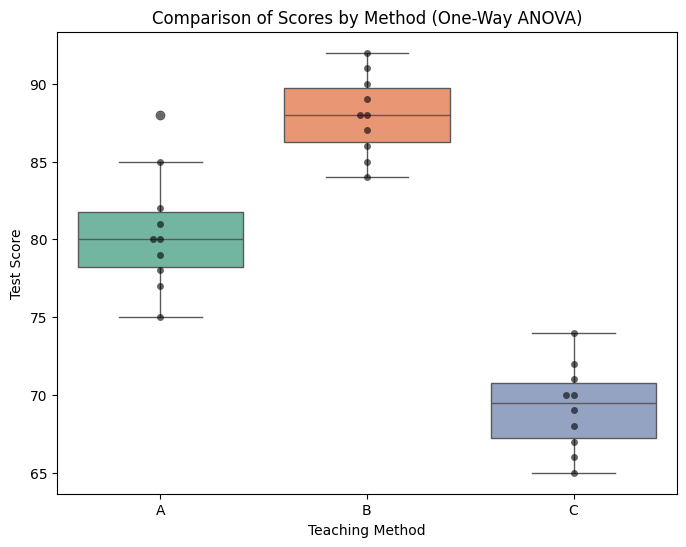

In [34]:
#Ans.

# Install necessary libraries if you don't have them
# pip install scipy pandas seaborn matplotlib

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create synthetic data
data = {
    'Method': ['A']*10 + ['B']*10 + ['C']*10,
    'Score': [80, 82, 78, 85, 88, 75, 79, 81, 77, 80,   # Method A
              85, 87, 84, 90, 92, 88, 89, 91, 86, 88,    # Method B
              70, 72, 68, 65, 74, 69, 71, 67, 66, 70]    # Method C
}

df = pd.DataFrame(data)

# 2. Perform One-Way ANOVA
group_A = df[df['Method'] == 'A']['Score']
group_B = df[df['Method'] == 'B']['Score']
group_C = df[df['Method'] == 'C']['Score']

f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

# 3. Display the result
print("\nOne-Way ANOVA Result:")
print(f"F-Statistic = {f_statistic:.4f}")
print(f"P-Value = {p_value:.4f}")

# 4. Visualize with boxplots
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Method', y='Score', palette="Set2")
sns.swarmplot(data=df, x='Method', y='Score', color='black', alpha=0.6)
plt.title('Comparison of Scores by Method (One-Way ANOVA)')
plt.ylabel('Test Score')
plt.xlabel('Teaching Method')
plt.show()

# Example usage (assuming your data is in a DataFrame called 'df'):
# Replace 'dependent_var' and 'independent_var' with the actual column names in your DataFrame
# anova_with_boxplot(df, 'dependent_var', 'independent_var')


Q23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means ?

In [35]:
#Ans.

import numpy as np
from scipy import stats

# Simulate two random samples from normal distributions
np.random.seed(0)  # for reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=50)  # Mean 10, standard deviation 2, 50 samples
sample2 = np.random.normal(loc=12, scale=2, size=50)  # Mean 12, standard deviation 2, 50 samples

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference between the means of the two samples.")


T-statistic: -4.131
P-value: 0.000
Reject the null hypothesis: There is a statistically significant difference between the means of the two samples.


Q24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results ?

In [36]:
#Ans.

import numpy as np
from scipy.stats import chi2

def hypothesis_test_variance(sample_data, population_variance, alpha=0.05):
    """
    Performs a hypothesis test for population variance using a Chi-square distribution.

    Args:
        sample_data: A list or numpy array of sample data.
        population_variance: The hypothesized population variance.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the chi-square statistic, p-value, and test result.
    """

    sample_variance = np.var(sample_data, ddof=1)  # Sample variance (use ddof=1 for unbiased estimate)
    n = len(sample_data)
    chi2_statistic = (n - 1) * sample_variance / population_variance
    p_value = chi2.cdf(chi2_statistic, df=n - 1)  # Use cdf for lower tail test

    if p_value < alpha / 2 or p_value > 1- alpha / 2 :  #Two tailed test
        result = "Reject the null hypothesis: The population variance is significantly different from the hypothesized value."
    else:
        result = "Fail to reject the null hypothesis: There is no significant difference between the population variance and the hypothesized value."

    return {
        "chi2_statistic": chi2_statistic,
        "p_value": p_value,
        "result": result
    }

# Example usage:
sample_data = [10, 12, 15, 11, 13, 10, 14, 12, 10, 13] # Sample data
population_variance_hypothesis = 4  # Hypothesized population variance
alpha = 0.05  # Significance level

test_results = hypothesis_test_variance(sample_data, population_variance_hypothesis, alpha)
test_results


{'chi2_statistic': np.float64(7.0),
 'p_value': np.float64(0.3628805928306016),
 'result': 'Fail to reject the null hypothesis: There is no significant difference between the population variance and the hypothesized value.'}

Q25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups ?

In [37]:
#Ans.


import numpy as np
from statsmodels.stats.proportion import proportions_ztest

def z_test_proportions(successes1, successes2, nobs1, nobs2, alternative='two-sided'):
    """
    Performs a Z-test for comparing proportions between two groups.

    Args:
        successes1: Number of successes in the first group.
        successes2: Number of successes in the second group.
        nobs1: Total number of observations in the first group.
        nobs2: Total number of observations in the second group.
        alternative: The alternative hypothesis ('two-sided', 'smaller', 'larger').

    Returns:
        A tuple containing the Z-statistic and the p-value.
    """

    z_stat, p_value = proportions_ztest([successes1, successes2], [nobs1, nobs2], alternative=alternative)
    return z_stat, p_value

# Example usage:
successes_group1 = 30  # Number of successes in group 1
nobs_group1 = 100    # Total observations in group 1
successes_group2 = 40  # Number of successes in group 2
nobs_group2 = 120    # Total observations in group 2
alpha = 0.05

z_stat, p_value = z_test_proportions(successes_group1, successes_group2, nobs_group1, nobs_group2)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in proportions between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in proportions between the two groups.")


Z-statistic: -0.5285499781147278
P-value: 0.5971176684141065
Fail to reject the null hypothesis: No significant difference in proportions between the two groups.


Q26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results ?

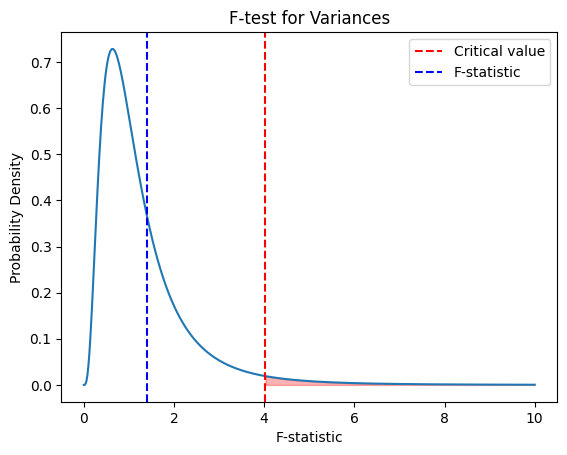

{'f_statistic': np.float64(1.3930348258706466),
 'p_value': np.float64(0.6294051762543409),
 'critical_value': np.float64(4.025994158282978),
 'result': 'Fail to reject the null hypothesis: No significant difference in variances.'}

In [38]:
#Ans.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def f_test_variances(sample1, sample2, alpha=0.05):
    """
    Performs an F-test to compare the variances of two datasets.

    Args:
        sample1: The first dataset (list or numpy array).
        sample2: The second dataset (list or numpy array).
        alpha: Significance level (default: 0.05).

    Returns:
        A dictionary containing the F-statistic, p-value, and test result.
        Also visualizes the F-distribution and the critical region.
    """

    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)

    # Calculate F-statistic
    f_statistic = var1 / var2 if var1 > var2 else var2 / var1
    df1 = n1 - 1
    df2 = n2 - 1
    p_value = 2 * min(f.cdf(f_statistic, df1, df2), 1 - f.cdf(f_statistic, df1, df2)) #two tailed test

    # Determine critical value
    critical_value = f.ppf(1 - alpha/2, df1, df2)

    # Interpret Results
    if p_value < alpha:
        result = "Reject the null hypothesis: Variances are significantly different."
    else:
        result = "Fail to reject the null hypothesis: No significant difference in variances."

    # Visualization
    x = np.linspace(0, max(10, f_statistic * 1.5), 500)
    y = f.pdf(x, df1, df2)
    plt.plot(x, y)
    plt.fill_between(x[x >= critical_value], 0, f.pdf(x[x >= critical_value], df1, df2), color="red", alpha=0.3)
    plt.axvline(x=critical_value, color="red", linestyle="--", label="Critical value")
    plt.axvline(x=f_statistic, color="blue", linestyle="--", label="F-statistic")

    plt.xlabel("F-statistic")
    plt.ylabel("Probability Density")
    plt.title("F-test for Variances")
    plt.legend()
    plt.show()

    return {
        "f_statistic": f_statistic,
        "p_value": p_value,
        "critical_value": critical_value,
        "result": result
    }

# Example usage
sample1 = [10, 12, 15, 11, 13, 10, 14, 12, 10, 13]
sample2 = [8, 9, 10, 7, 11, 9, 8, 10, 9, 12]

result = f_test_variances(sample1, sample2)
result


Q27.  Perform a Chi-square test for goodness of fit with simulated data and analyze the results ?

In [39]:
#Ans.

import numpy as np
# Simulate observed data (replace with your actual data)
observed_frequencies = np.random.randint(10, 30, size=5)  # Example: 5 categories

# Define the expected distribution (replace with your expected distribution)
expected_probabilities = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # Example: uniform distribution
total_observations = np.sum(observed_frequencies)
expected_frequencies = expected_probabilities * total_observations

# Perform the Chi-square test
chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

# Analyze the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed data fits the expected distribution.")


Chi-square statistic: 5.625
P-value: 0.22895842135086153
Fail to reject the null hypothesis: The observed data fits the expected distribution.
